# Pràctica 2: La regressió

## Objectius

Els objectius d'aquesta pràctica són:
* Aplicar models de regressió, ficant l'èmfasi en:
 * Analitzar els atributs per seleccionar els més representatius i normalitzar-los.
 * Avaluar correctament l'error del model 
 * Visualitzar les dades i el model resultant
 * Saber aplicar el procès de descens del gradient

* Ésser capaç d'aplicar tècniques de regressió en casos reals

* Validar els resultats en dades reals

* Fomentar la capacitat per presentar resultats tècnics d'aprenentatge computacional de forma adequada davant altres persones


## Avaluació i entregues

### Entregues
Les pràctiques es realitzarán els divendres de 15:00 a 17:00. Cada setmana presentarem nous mètodes i algorismes vistos a la classe de teoria.

L'entrega, es realitzarà el següent dijous abans de les 23:59, és a dir, tindreu les hores de classe més tota una setmana per a realitzar les tasques. Es pujará un .ipynb ja executat, on no només hi hagi codi sinó també text explicatiu de gràfiques, resultats, i analisis. Tingueu en compte que no es valora tant la quantitat, sino la qualitat del que s'hi explica. Hem d'aprendre a extreure el gra de la palla i presentar-ho de forma correcta i concisa.


### Avaluació
Generalment, per tal de que veigueu varietat de dades i problematiques, es treballarà sobre dues bases de dades cada setmana. La primera serà comuna per tothom i, en aquest cas, tindrá la temática del COVID. La segona, tot i ser de lliure elecció (us deixem que l'escolliu vosaltres mateixos), haurà de tenir uns mínims de dificultat (o almenys, que tinguin una mica de gràcia). 


#### COVID data

Durant el primer mes, treballarem amb una base de dades comuna, amb la temática del COVID-19. Podeu trobar la darrera actualització a [OWID DATA](https://github.com/owid/covid-19-data/tree/master/public/data), tot i que no farem servir cap dada a partir del 1 de Octubre de 2020, per això us recomanem de fer servir la que tenim penjada al Campus Virtual.

#### Dataset lliure elecció
Podeu trobar datasets de dades a qualsevol d'aquestes dues webs:
* https://www.kaggle.com/datasets?search=machine+learning
* https://archive.ics.uci.edu/ml/datasets.php

L'objectiu será escollir un dataset adequat per la tasca que volem realitzar. LLavors, el primer apartat serà conèixer la base de dades que es té entre mans. S'han d'analitzar els diferents atributs que la composen, entendre'ls i, si no està estipulat, **caldrà fixar quin es l'atribut objectiu a predir de tots els que hi ha a la base de dades**, justificant el per què de la decisió (és útil i representatiu pel problema, per exemple, donat un conjunt de dades sobre persones: edat, gènere, pes, alçada, risc de patir càncer, aquesta última pot ser justificada com la de més interés). També podeu mirar que l'atribut objectiu tingui valors que canvien. Per exemple, no té sentit predir un atribut on el 99% dels valors són 0, i hi ha algun 1.


### Pràctica 2: Regressió Lineal i Polinomial
En la pràctica 1, es presenten diversos problemes per comprendre els mètodes de regressió numèrica. Cada apartat pot tenir una qualificació diferent.

* A. Exploració de la base de dades (30%)
* B. Ús de regressor Lineal (30%)
* C. Demostració d'assoliment (A+B en una nova BBDD) (20%)
* D. Implementació Regressor Lineal (20%)
* (Extra) Implementació Regresor polinomial (+10%, max: 10pts)



A continuació us posem un esquelet de codi que podeu tenir com a referència (o no)

In [117]:
# Codi esquelet per la pràctica de la 2 sessió: Regressió Lineal i Polinomial

import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()


# Visualitzarem només 3 decimals per mostra, i definim el num de files i columnes a mostrar
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 50)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
dataset = load_dataset('owid-covid-data.csv')

print("Dimensionalitat de la BBDD:", dataset.shape)


Dimensionalitat de la BBDD: (47328, 41)


A continuació veurem algunes taules i gràfiques per entendre com són les dades que tenim:

In [118]:
dataset

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.000,2.000,nan,0.000,0.000,nan,18.733,18.733,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
1,ABW,North America,Aruba,2020-03-19,nan,nan,0.286,nan,nan,0.000,nan,nan,2.676,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,33.330,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
2,ABW,North America,Aruba,2020-03-20,4.000,2.000,0.286,0.000,0.000,0.000,37.465,18.733,2.676,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,33.330,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
3,ABW,North America,Aruba,2020-03-21,nan,nan,0.286,nan,nan,0.000,nan,nan,2.676,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
4,ABW,North America,Aruba,2020-03-22,nan,nan,0.286,nan,nan,0.000,nan,nan,2.676,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47323,NaN,NaN,International,2020-09-27,696.000,nan,nan,7.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
47324,NaN,NaN,International,2020-09-28,696.000,nan,nan,7.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
47325,NaN,NaN,International,2020-09-29,696.000,nan,nan,7.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
47326,NaN,NaN,International,2020-09-30,696.000,nan,nan,7.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [119]:
dataset.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,46714.000,46502.000,45720.000,46714.000,46502.000,45720.000,46438.000,46438.000,45655.000,46438.000,46438.000,45655.000,17022.000,17430.000,17430.000,17022.000,19196.000,19196.000,17665.000,18098.000,39364.000,47052.000,44901.000,42195.000,41567.000,41976.000,41649.000,27790.000,42203.000,43693.000,33054.000,32635.000,19766.000,38120.000,46458.000,40717.000
mean,105304.798,1463.590,1451.104,4181.072,43.656,43.712,1967.496,25.122,24.747,58.924,0.568,0.567,23599.478,1572278.393,55.184,0.745,22774.285,0.729,173.259,0.065,57.369,88300500.969,360.499,31.319,9.256,5.854,20893.575,12.127,251.593,8.049,10.811,32.635,52.445,3.110,74.023,0.725
std,1089825.655,13268.625,13077.552,38853.696,367.208,357.460,4142.360,75.623,58.381,144.982,2.993,1.900,96057.307,6965831.413,110.468,1.432,87943.651,1.295,887.276,0.091,27.398,612410778.511,1654.659,9.027,6.318,4.315,20427.288,19.229,117.530,4.148,10.479,13.420,31.603,2.526,7.373,0.153
min,0.000,-8261.000,-552.000,0.000,-1918.000,-232.143,0.000,-2212.545,-269.978,0.000,-67.901,-9.678,-3743.000,1.000,0.000,-0.398,0.000,0.000,1.488,0.000,0.000,809.000,0.137,15.100,1.144,0.526,661.240,0.100,79.370,0.990,0.100,7.700,1.188,0.100,53.280,0.354
25%,62.000,0.000,0.571,1.000,0.000,0.000,32.357,0.000,0.149,0.026,0.000,0.000,991.250,47101.250,2.755,0.062,1066.000,0.063,11.656,0.008,38.890,1399491.000,37.728,23.300,3.552,2.142,5338.454,0.500,155.898,5.310,1.900,21.400,21.222,1.300,69.910,0.606
50%,1067.000,10.000,15.143,21.000,0.000,0.143,290.308,1.594,3.014,5.114,0.000,0.021,3333.500,198537.000,14.550,0.292,3723.500,0.307,32.850,0.029,62.960,8654618.000,88.125,31.400,6.981,4.419,14103.452,1.900,238.339,7.110,6.400,31.400,55.182,2.500,75.445,0.754
75%,11496.000,168.000,173.465,248.000,3.000,3.143,2047.809,18.209,20.044,36.511,0.206,0.297,12178.250,777617.000,61.396,0.869,13095.500,0.870,106.647,0.084,79.630,31072945.000,214.243,39.700,14.762,9.473,32415.132,16.000,318.991,10.180,19.600,40.900,83.741,4.200,79.380,0.853
max,34029923.000,321127.000,297041.143,1015043.000,10491.000,7456.714,43650.601,4944.376,882.924,1237.551,215.382,63.140,1492409.000,113263096.000,1327.460,25.920,1169107.000,19.058,47299.000,0.672,100.000,7794798729.000,19347.500,48.200,27.049,18.493,116935.600,77.600,724.417,23.360,44.000,78.100,98.999,13.800,86.750,0.953


In [120]:
covid_spain = dataset[dataset.location=="Spain"]
covid_italy = dataset[dataset.location=="Italy"]
covid_spain

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
13450,ESP,Europe,Spain,2019-12-31,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13451,ESP,Europe,Spain,2020-01-01,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13452,ESP,Europe,Spain,2020-01-02,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13453,ESP,Europe,Spain,2020-01-03,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13454,ESP,Europe,Spain,2020-01-04,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13720,ESP,Europe,Spain,2020-09-26,716481.000,0.000,10920.143,31232.000,0.000,105.286,15324.229,0.000,233.562,667.996,0.000,2.252,94782.000,9533306.000,203.900,2.027,105165.000,2.249,9.630,0.104,tests performed,55.090,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13721,ESP,Europe,Spain,2020-09-27,716481.000,0.000,10920.143,31232.000,0.000,105.286,15324.229,0.000,233.562,667.996,0.000,2.252,64576.000,9597882.000,205.281,1.381,99074.000,2.119,9.073,0.110,tests performed,55.090,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13722,ESP,Europe,Spain,2020-09-28,748266.000,31785.000,10971.143,31411.000,179.000,106.857,16004.052,679.823,234.653,671.824,3.828,2.285,nan,nan,nan,nan,nan,nan,nan,nan,NaN,55.090,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891
13723,ESP,Europe,Spain,2020-09-29,758172.000,9906.000,10843.571,31614.000,203.000,101.429,16215.924,211.871,231.924,676.166,4.342,2.169,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,46754783.000,93.105,45.500,19.436,13.799,34272.360,1.000,99.403,7.170,27.400,31.400,nan,2.970,83.560,0.891


In [121]:
dataset["datetime"] = pd.to_datetime(dataset["date"], format='%Y-%m-%d', errors='ignore')

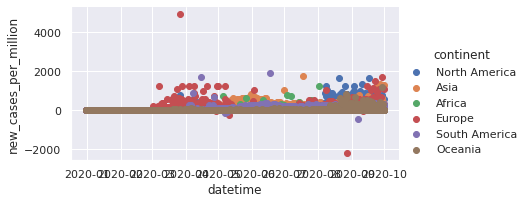

In [122]:
fg = sns.FacetGrid(data=dataset, hue='continent',aspect=2)
fg.map(plt.scatter, 'datetime', 'new_cases_per_million').add_legend()

Quina correlació entre aquests atributs hi veieu?


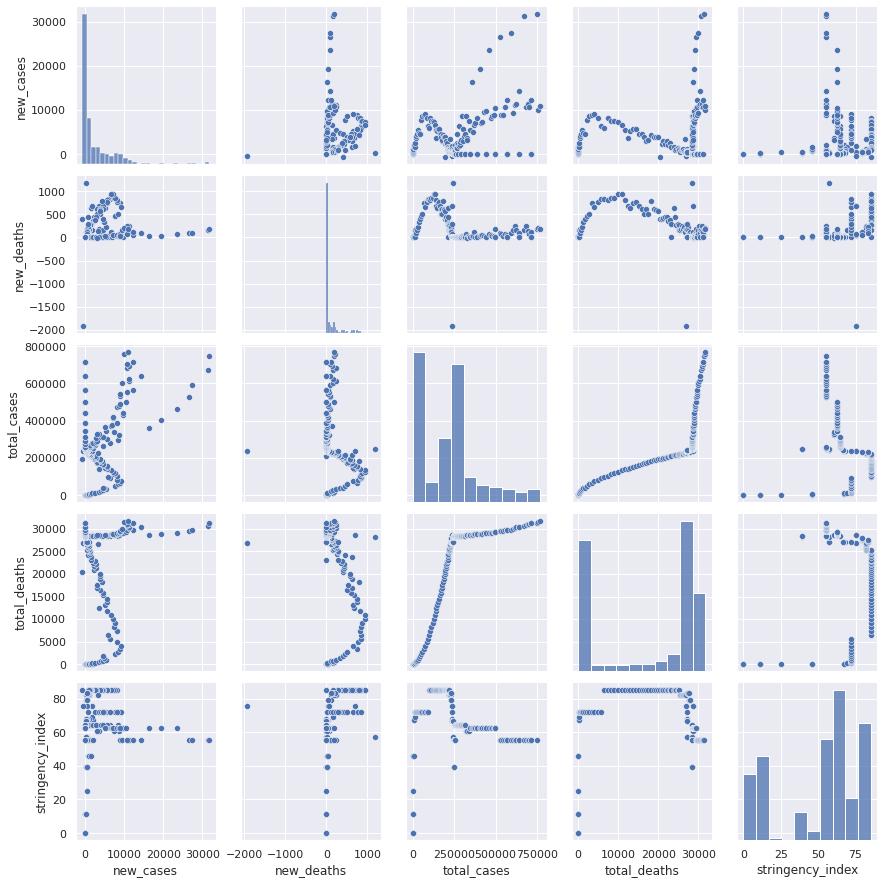

In [123]:
print("Quina correlació entre aquests atributs hi veieu?")

selected_columns = ["location", "new_cases", "new_deaths", "total_cases", "total_deaths", "stringency_index"]
sns.pairplot(covid_spain[selected_columns])
plt.show()

Què passa si utilitzem les dades smoothed?


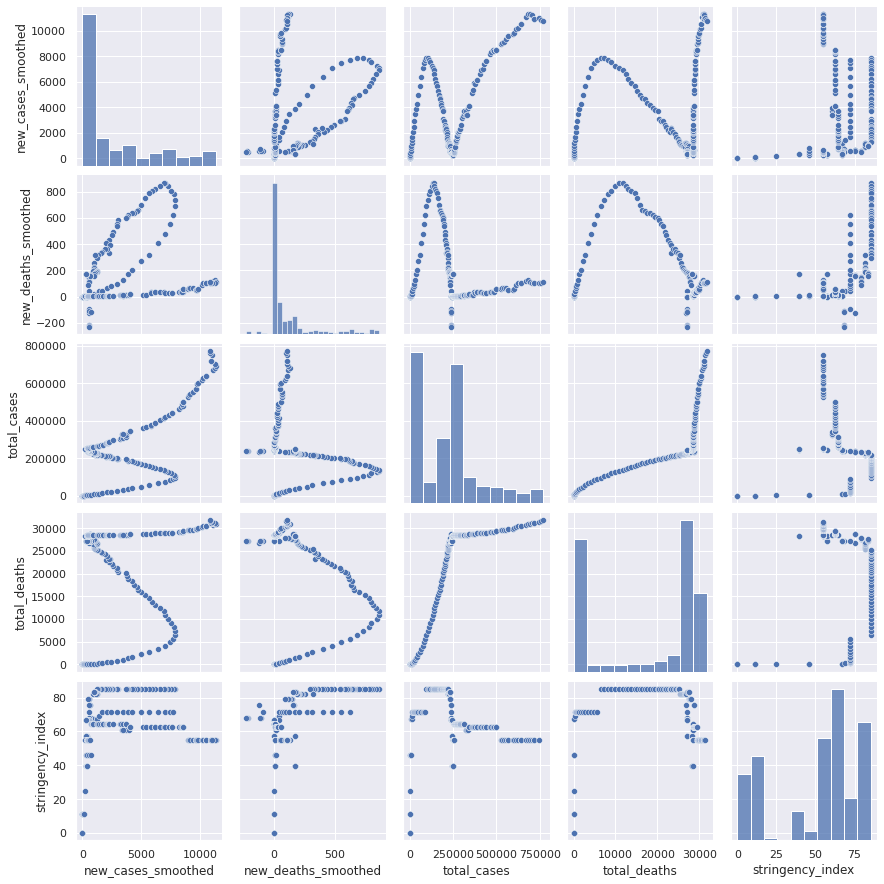

In [124]:
print("Què passa si utilitzem les dades smoothed?")

selected_columns = ["location", "new_cases_smoothed", "new_deaths_smoothed", "total_cases", "total_deaths", "stringency_index"]
sns.pairplot(covid_spain[selected_columns])
plt.show()

In [125]:
print("I si busquem alguna correlació entre paisos per un dia concret?")

covid_agost = dataset[dataset.date=="2020-08-01"]
covid_agost

I si busquem alguna correlació entre paisos per un dia concret?


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,datetime
136,ABW,North America,Aruba,2020-08-01,121.000,1.000,0.429,3.000,0.000,0.000,1133.320,9.366,4.014,28.099,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,32.410,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan,2020-08-01
412,AFG,Asia,Afghanistan,2020-08-01,36710.000,168.000,96.286,1283.000,12.000,5.286,943.015,4.316,2.473,32.958,0.308,0.136,nan,nan,nan,nan,nan,nan,nan,nan,NaN,78.700,38928341.000,54.422,18.600,2.581,1.337,1803.987,nan,597.029,9.590,nan,nan,37.746,0.500,64.830,0.498,2020-08-01
606,AGO,Africa,Angola,2020-08-01,1109.000,31.000,36.857,51.000,3.000,2.571,33.743,0.943,1.121,1.552,0.091,0.078,nan,nan,nan,nan,nan,nan,nan,nan,NaN,79.170,32866268.000,23.890,16.800,2.405,1.362,5819.495,nan,276.045,3.940,nan,nan,26.664,nan,61.150,0.581,2020-08-01
795,AIA,North America,Anguilla,2020-08-01,3.000,0.000,0.000,0.000,0.000,0.000,199.973,0.000,0.000,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,24.070,15002.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,81.880,nan,2020-08-01
1002,ALB,Europe,Albania,2020-08-01,5276.000,79.000,100.857,157.000,3.000,4.143,1833.345,27.452,35.047,54.556,1.042,1.440,nan,nan,nan,nan,nan,nan,nan,nan,NaN,59.260,2877800.000,104.871,38.000,13.188,8.643,11803.431,1.100,304.195,10.080,7.100,51.200,nan,2.890,78.570,0.785,2020-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46322,ZAF,Africa,South Africa,2020-08-01,493183.000,11014.000,10169.571,8005.000,193.000,237.429,8315.527,185.706,171.468,134.972,3.254,4.003,42450.000,3001985.000,50.616,0.716,38739.000,0.653,3.809,0.263,people tested,80.560,59308690.000,46.754,27.300,5.344,3.053,12294.876,18.900,200.380,5.520,8.100,33.200,43.993,2.320,64.130,0.699,2020-08-01
46519,ZMB,Africa,Zambia,2020-08-01,5963.000,408.000,301.000,151.000,2.000,3.000,324.359,22.193,16.373,8.214,0.109,0.163,1908.000,85001.000,4.624,0.104,1276.000,0.069,4.239,0.236,tests performed,50.930,18383956.000,22.995,17.700,2.480,1.542,3689.251,57.500,234.499,3.940,3.100,24.700,13.938,2.000,63.890,0.588,2020-08-01
46714,ZWE,Africa,Zimbabwe,2020-08-01,3169.000,77.000,124.714,67.000,14.000,5.000,213.215,5.181,8.391,4.508,0.942,0.336,1445.000,61577.000,4.143,0.097,1367.000,0.092,10.961,0.091,tests performed,80.560,14862927.000,42.729,19.600,2.822,1.882,1899.775,21.400,307.846,1.820,1.600,30.700,36.791,1.700,61.490,0.535,2020-08-01
46990,OWID_WRL,NaN,World,2020-08-01,17577428.000,279062.000,259257.000,674453.000,6123.000,5666.000,2255.020,35.801,33.260,86.526,0.786,0.727,nan,nan,nan,nan,nan,nan,nan,nan,NaN,nan,7794798729.000,58.045,30.900,8.696,5.355,15469.207,10.000,233.070,8.510,6.434,34.635,60.130,2.705,72.580,nan,2020-08-01


<AxesSubplot:>

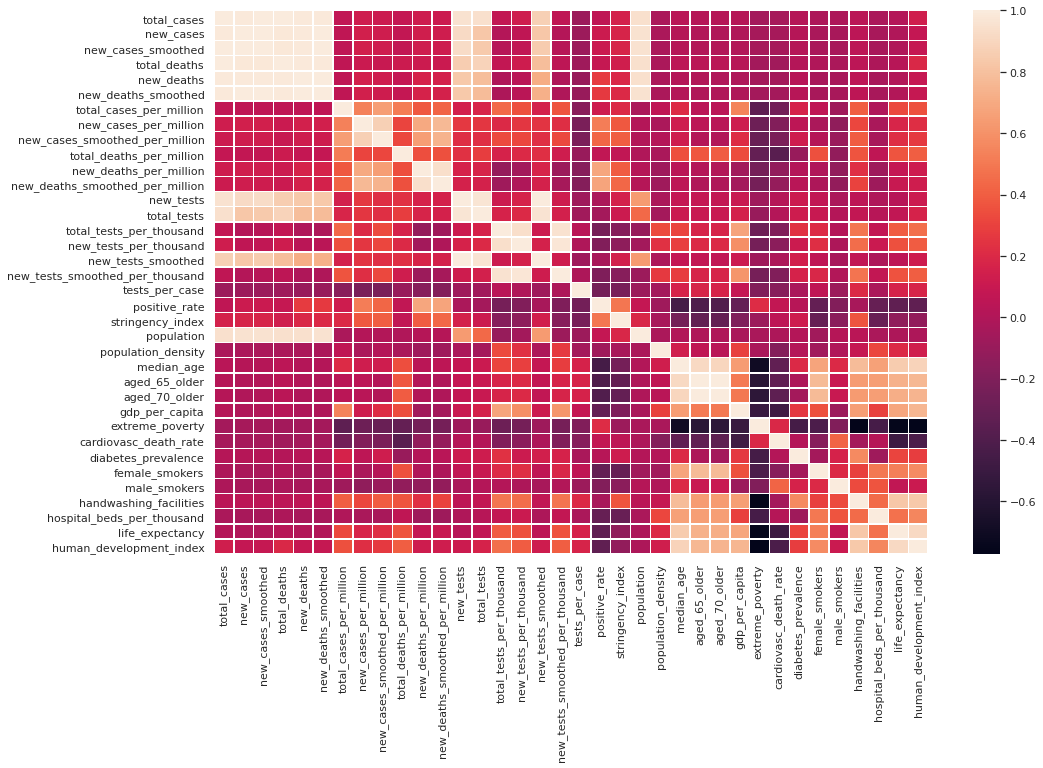

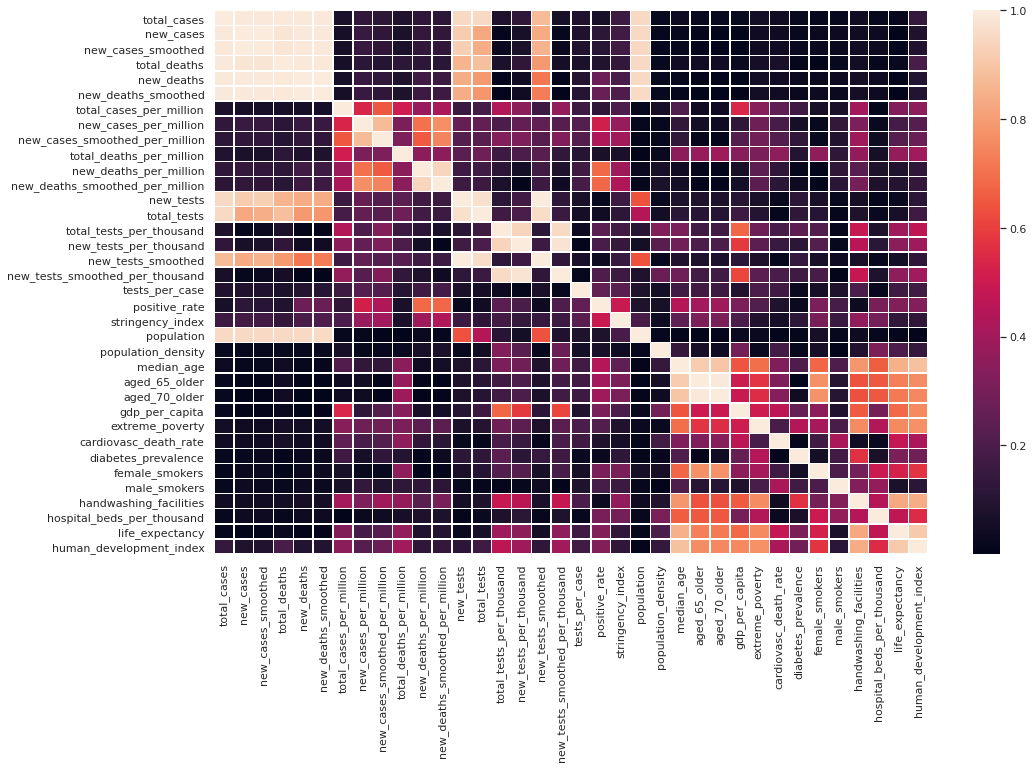

In [126]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(covid_agost.corr(), annot=False, fmt="f", linewidths=.5, ax=ax)
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(abs(covid_agost.corr()), annot=False, fmt="f", linewidths=.5, ax=ax)

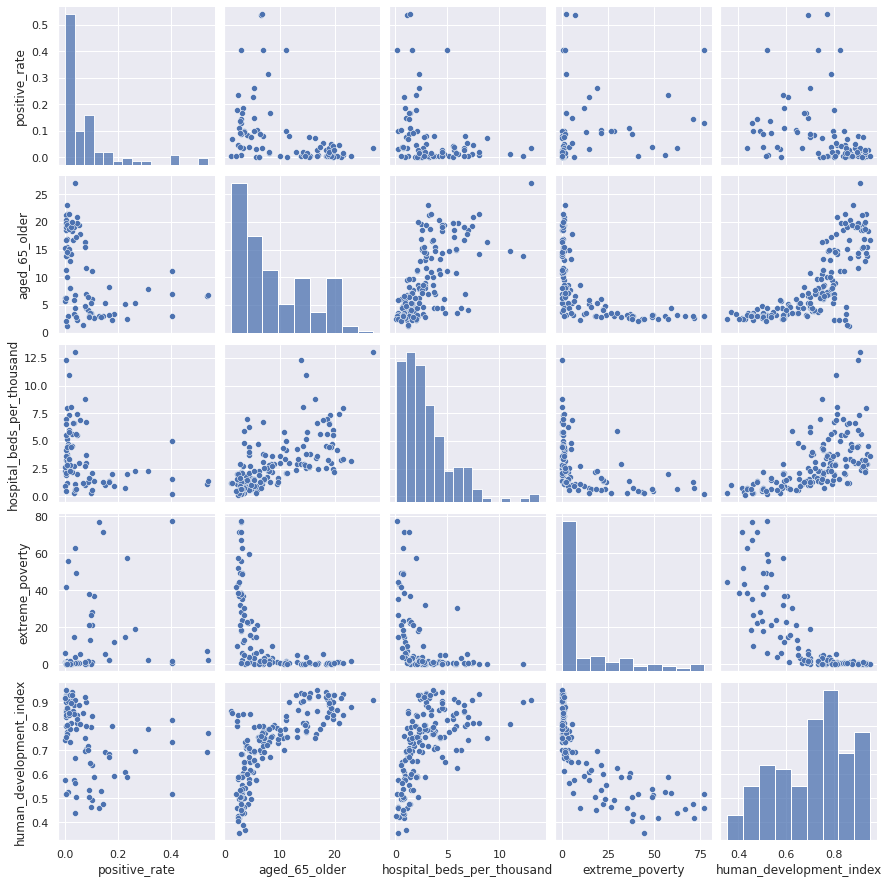

In [127]:
selected_columns = ["positive_rate", "aged_65_older", "hospital_beds_per_thousand", "extreme_poverty", "human_development_index"]
sns.pairplot(covid_agost[selected_columns])


A continuació, teniu unes funcions que de ben segur haurieu de completar per tal de poder respondre a les preguntes. Podeu implementar-les vosaltres mateixos i llavors comparar-les amb funcions de sklearn (si existeixen) 

In [128]:
def mostra_correlacions(data):
    # TODO mostra les correlacions entre els atributs 
    pass

def normalitzador_de_dades(data):
    # TODO aplica algun tipus de normalitzador als atributs
    return data

def separar_train_test(data, target, ratio=0.8):
    # TODO retorna les dades en dos subconjunts diferents amb un ratio de 'ratio'
    data_train = data
    data_val = []
    target_train = target
    target_val = []
    return data_train, data_val, target_train, target_val 

def aplicar_regressor_lineal(data, target):
    prediccions = []
    # TODO aplica un regressor lineal amb les dades per predir el target
    return prediccions


def calcula_metrica_error(prediccions, target, tipus):
    # TODO utilitza varies metriques segons la var "tipus" que analitzin les prediccions
    if tipus == "mse":
        return 0
    elif tipus == "r2":
        return 0
    else:
        print ("Metrica {} no reconeguda".format(tipus))
        return -1



## A. Exploració de la base de dades (30%)

En aquest apartat aprendrem a analitzar les dades de la base de dades. Les següents funcions ens poden anar bé:

* [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
* [DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
* [sns.pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

Podeu veure algunes idees de 
https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction

Descripció dels camps:
https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv



### Preguntes a respondre
1. Dimensionalitat de la BBDD. Quants exemples, quantes caracteristiques tenim.
2. Com són les caracteristiques?
3. Hi tenim totes les dades (quin % de dades tenim)
4. Quin tipus de atributs tenim a la base de dades.
5. Mostra els atributs més rellevants.
6. Quins atributs están més correlacionats. Mostra'ls.
7. Mostra (almenys) 5 tipus diferents de gràfiques sobre les dades.
8. Els valors es troben tots a la mateixa escala? Ens importa?
9. Quins atributs tenen una distribució Guassiana?
10. Quin és l'atribut objectiu? Per què?


#### 1. Dimensionalitat de la BBDD. Quants exemples, quantes caracteristiques tenim.

Com podem veure a continuació, tenim 47328 exemples (mostres), cadascún amb 41 característiques (columnes)

In [129]:
dataset = load_dataset('owid-covid-data.csv')

print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (47328, 41)


#### 2. Com són les característiques?

Com podem veure, totes les característiques son floats, excepte 5 que son strings. Guardem les característiques numèriques en una llista, per a la seva posterior utilització.

In [130]:
numeric_attributes = []

for key in dataset:
    for element in dataset[key]:
        if not pd.isnull(element):
            print(type(element))
            if isinstance(element, float):
                numeric_attributes.append(key)
            break

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


#### 3. Hi tenim totes les dades (quin % de dades tenim)

Com podem veure a continuació, tenim aproximadament el 78.83% de les dades (la resta son NaN's)

In [131]:
100*(1 - dataset.isna().sum().sum()/dataset.size)

78.8296310954996

#### 4. Quin tipus de atributs tenim a la base de dades.

Com podem veure a continuació, entre els atributs de la base de dades trobem:

* Atributs descriptors de localització (iso_code, continent i location)
* Un atribut que indica la data corresponent a la informació de la fila (date)
* Atributs descriptors d'una certa població humana (population, population_density, median_age, aged_65_older, gdp_per_capita, extreme_poverty, cardiovasc_death_Rate, diabetes_prevalence, life_expectancy, etc...)
* Atributs relacionats amb el la pandemia del covid19. Aquest grup el podem dividir en
    * Atributs que recopilen informació sobre el numero de casos (total_cases, new_cases, new_cases_per_million, etc...)
    * Atributs que recopilen informació sobre el numero de morts (total_deats, new_deaths, etc...)
    * Atributs que recopilen informació sobre el numero de tests realitzats (total_tests, new_tests, tests_per_case, etc...)
    
En resum, la base de dades conté informació sobre l'evolució en el temps del covid en diversos paísos, així com informació sobre l'estat socioeconòmic d'aquests paísos i les mesures preses (tests).

In [132]:
dataset.head(10)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.000,2.000,nan,0.000,0.000,nan,18.733,18.733,nan,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,0.000,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
1,ABW,North America,Aruba,2020-03-19,nan,nan,0.286,nan,nan,0.000,nan,nan,2.676,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,33.330,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
2,ABW,North America,Aruba,2020-03-20,4.000,2.000,0.286,0.000,0.000,0.000,37.465,18.733,2.676,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,33.330,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
3,ABW,North America,Aruba,2020-03-21,nan,nan,0.286,nan,nan,0.000,nan,nan,2.676,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
4,ABW,North America,Aruba,2020-03-22,nan,nan,0.286,nan,nan,0.000,nan,nan,2.676,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
5,ABW,North America,Aruba,2020-03-23,nan,nan,0.286,nan,nan,0.000,nan,nan,2.676,nan,nan,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
6,ABW,North America,Aruba,2020-03-24,12.000,8.000,1.429,0.000,0.000,0.000,112.395,74.930,13.380,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
7,ABW,North America,Aruba,2020-03-25,17.000,5.000,2.143,0.000,0.000,0.000,159.227,46.831,20.071,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
8,ABW,North America,Aruba,2020-03-26,19.000,2.000,2.429,0.000,0.000,0.000,177.959,18.733,22.747,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan
9,ABW,North America,Aruba,2020-03-27,28.000,9.000,3.429,0.000,0.000,0.000,262.256,84.296,32.113,0.000,0.000,0.000,nan,nan,nan,nan,nan,nan,nan,nan,NaN,44.440,106766.000,584.800,41.200,13.085,7.452,35973.781,nan,nan,11.620,nan,nan,nan,nan,76.290,nan


#### 5. Mostra els atributs més rellevants.

Tot i que la importància dels atributs depèn de l'aplicació/estudi que es vulgui realitzar, en la meva opinió els mes rellevants son:
* continent+location: ja que determinen la posició geogràfica de la que s'han obtingut les dades.
* date: ja que determina el moment en el que s'han obtingut.
* total_cases+new_cases+total_deats+new_deaths: ja que, en essència, expliquen com és l'evolució de la pandemia.
* new_tests+total_tests: junt amb els anteriors, permeten estudiar la correlació entre els tests i els contagis, i entre els tests i la mortalitat.
* population+population_density+median_age+gdp_per_capita+extreme_poverty+cardiovasc_Death_rate+diabetes_prevalence+female_smokers+male_smokers+hospital_beds_per_thousand: ja que analitzant la correlació d'aquests atributs amb la mortalitat i/o el nombre de contagis es pot averiguar quines son les mesures mes efectives per a reduir l'impacte del covid.

In [133]:
dataset[["continent", "location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths",
        "new_tests", "total_tests", "population", "population_density", "median_age", "gdp_per_capita",
       "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", "male_smokers",
       "hospital_beds_per_thousand"]].head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,population,population_density,median_age,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand
0,North America,Aruba,2020-03-13,2.000,2.000,0.000,0.000,nan,nan,106766.000,584.800,41.200,35973.781,nan,nan,11.620,nan,nan,nan
1,North America,Aruba,2020-03-19,nan,nan,nan,nan,nan,nan,106766.000,584.800,41.200,35973.781,nan,nan,11.620,nan,nan,nan
2,North America,Aruba,2020-03-20,4.000,2.000,0.000,0.000,nan,nan,106766.000,584.800,41.200,35973.781,nan,nan,11.620,nan,nan,nan
3,North America,Aruba,2020-03-21,nan,nan,nan,nan,nan,nan,106766.000,584.800,41.200,35973.781,nan,nan,11.620,nan,nan,nan
4,North America,Aruba,2020-03-22,nan,nan,nan,nan,nan,nan,106766.000,584.800,41.200,35973.781,nan,nan,11.620,nan,nan,nan


#### 6. Quins atributs están més correlacionats. Mostra'ls.

A continuació veiem les 5 parelles d'atributs mes correlacionats.

In [134]:
corrMatrix = dataset.corr().abs()
corrVector = corrMatrix.unstack() #Flattens the corrMatrix
corrVector.sort_values(ascending=False)[corrMatrix.shape[0]:corrMatrix.shape[0]+10:2]

aged_70_older        aged_65_older        0.994
new_cases            new_cases_smoothed   0.994
new_tests            new_tests_smoothed   0.985
total_deaths         total_cases          0.975
new_deaths_smoothed  new_deaths           0.972
dtype: float64

#### 7. Mostra (almenys) 5 tipus diferents de gràfiques sobre les dades.

A continuació veiem els box-plot d'alguns dels atributs.

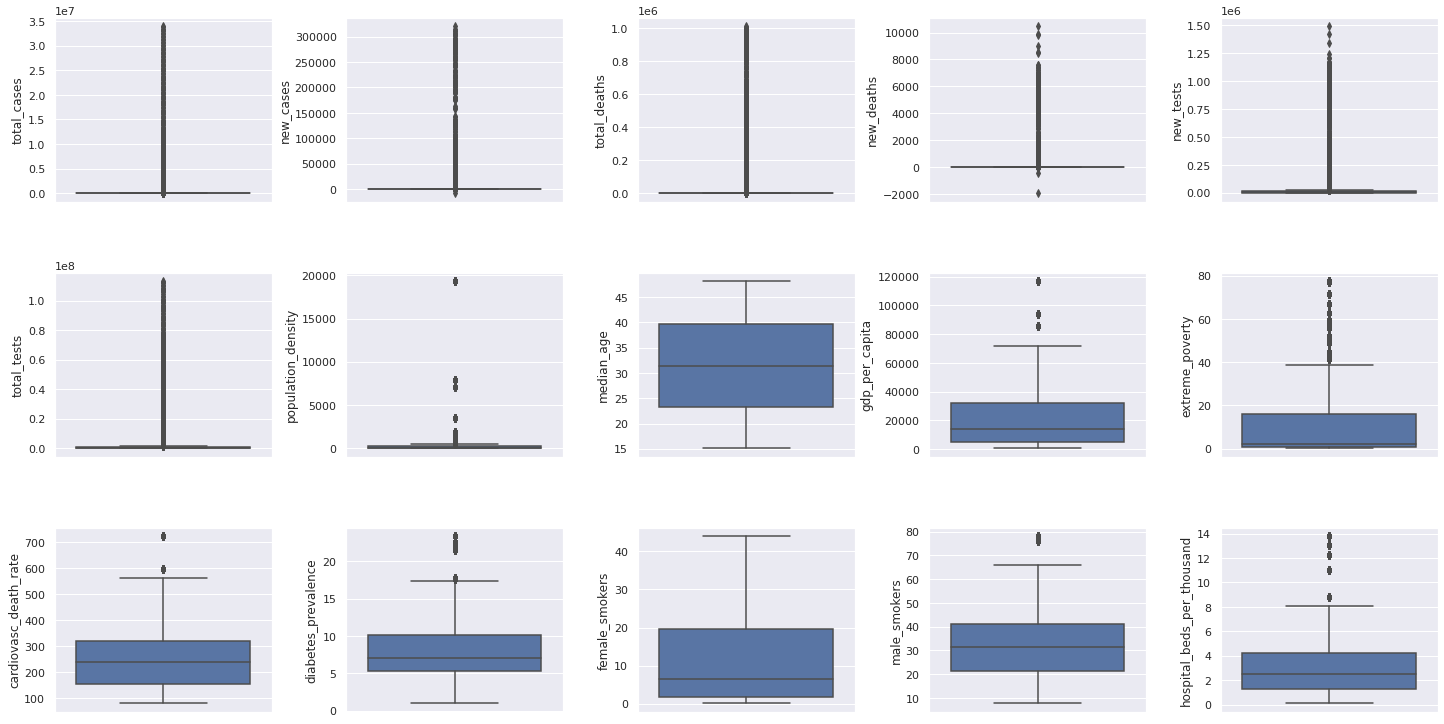

In [135]:
atributos = ["total_cases", "new_cases", "total_deaths", "new_deaths",
        "new_tests", "total_tests", "population_density", "median_age", "gdp_per_capita",
       "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence", "female_smokers", "male_smokers",
       "hospital_beds_per_thousand"]
fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset[atributos].items():
    sns.boxplot(y=k, data=dataset[atributos], ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

A conntinuació veiem gràfiques de tipus "X"vs"new_cases". On "X" son alguns dels atributs del dataset. També inclouen la recta de regressió simple de "new_cases" respecte de "X".

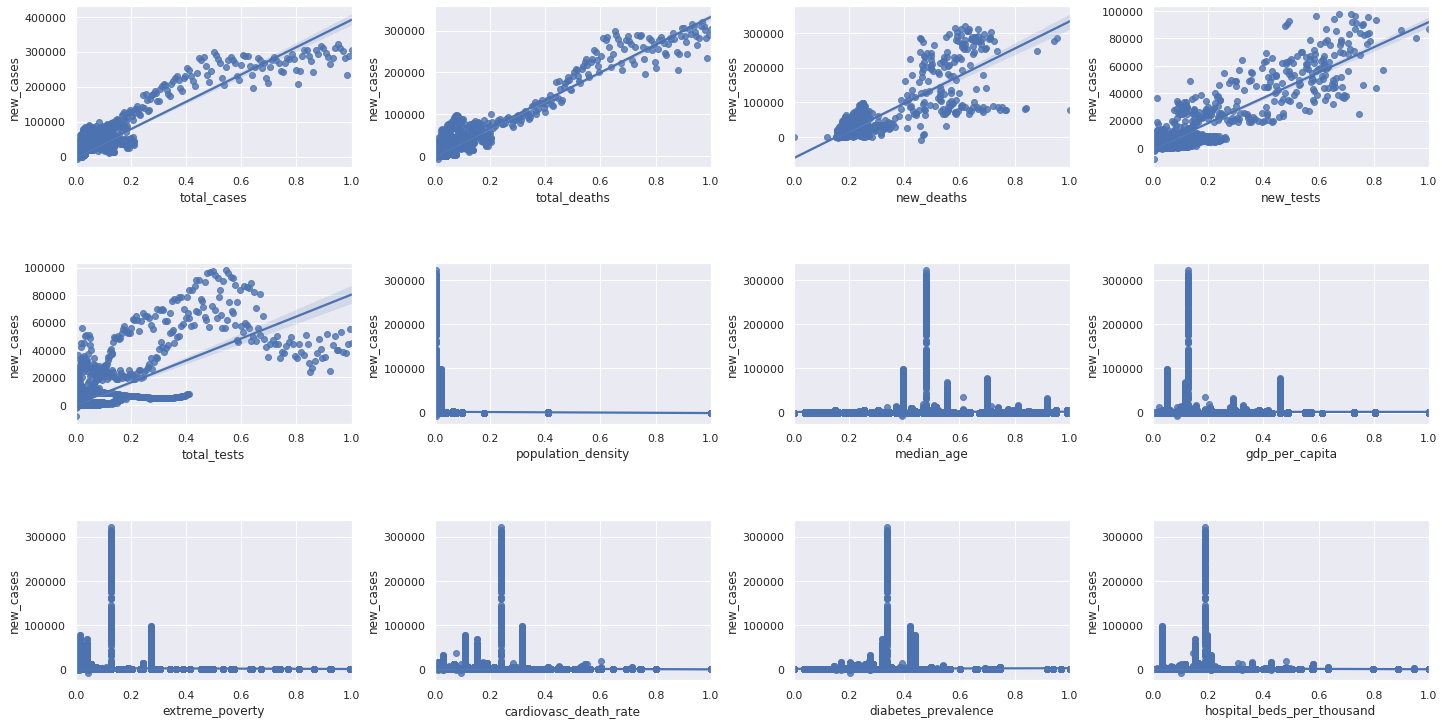

In [136]:
from sklearn import preprocessing
atributos = ["total_cases", "total_deaths", "new_deaths",
        "new_tests", "total_tests", "population_density", "median_age", "gdp_per_capita",
       "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence",
       "hospital_beds_per_thousand"]
min_max_scaler = preprocessing.MinMaxScaler()
x = dataset.loc[:,atributos]
y = dataset['new_cases']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=atributos)
fig, axs = plt.subplots(ncols=4, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(atributos):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

A continuació podem veure l'histograma d'alguns dels atributs del dataset.

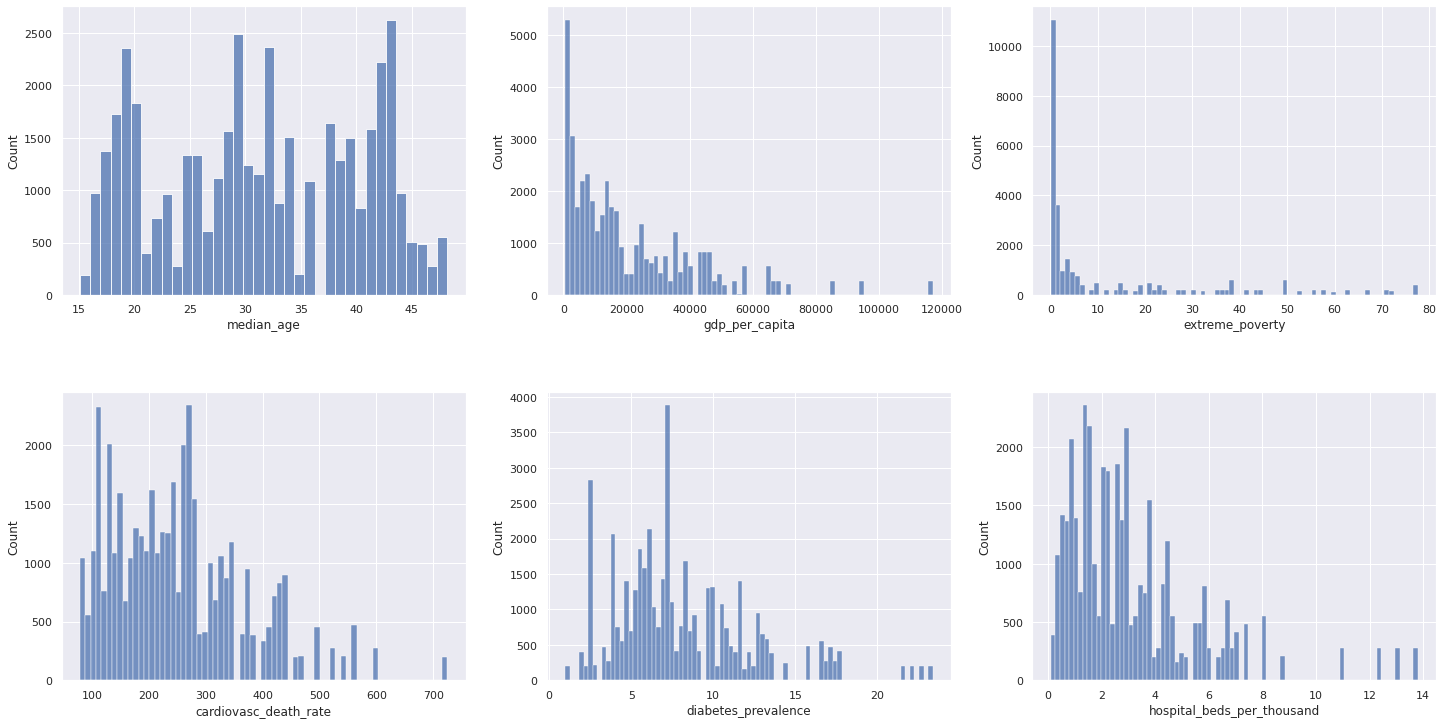

In [137]:
atributos = ["median_age", "gdp_per_capita",
       "extreme_poverty", "cardiovasc_death_rate", "diabetes_prevalence",
       "hospital_beds_per_thousand"]
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset[atributos].items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

A continuació veiem un barplot dels MSE's obtinguts fent models de regressió lineal de "new_deaths" respecte d'alguns dels atributs del dataset.

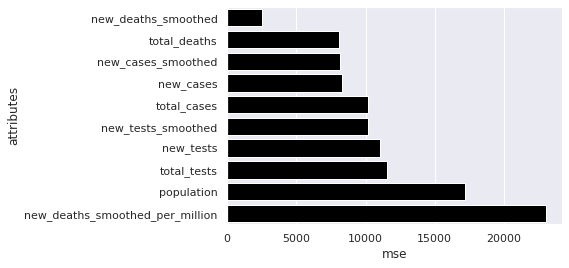

In [138]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

numerical_data = dataset[numeric_attributes].dropna(how='any', axis=0).sample(frac=1, random_state=19)
size = len(numerical_data.index)

eval_dataset = numerical_data[:int(size/6)]
train_dataset = numerical_data[int(size/6):]

objective_variable = "new_deaths"

X_t = train_dataset.drop(objective_variable, axis=1)
y_t = train_dataset[objective_variable]

X_e = eval_dataset.drop(objective_variable, axis=1)
y_e = eval_dataset[objective_variable]


reg = LinearRegression().fit(X_t, y_t)

show_best_X_attributes = 10

MSE_list = []

for variable_regressora in X_t:
    reg_uni = LinearRegression().fit(X_t[variable_regressora].to_numpy().reshape(-1, 1), y_t)
    y_pred = reg_uni.predict(X_e[variable_regressora].to_numpy().reshape(-1, 1))
    MSE_list.append((variable_regressora, mean_squared_error(y_e, y_pred)))

MSE_list.sort(key=lambda x:x[1])

df = pd.DataFrame({"attributes" : [x[0] for x in MSE_list[:show_best_X_attributes]], 
                   "mse" : [x[1] for x in MSE_list[:show_best_X_attributes]]})
ax = sns.barplot(x = 'mse', y = 'attributes', 
              data = df, 
              color = 'black')
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

mse_total_deaths = MSE_list[1]

Finalment, veiem un pie chart de les 10 MSE's mes baixes obtingudes anteriorment.

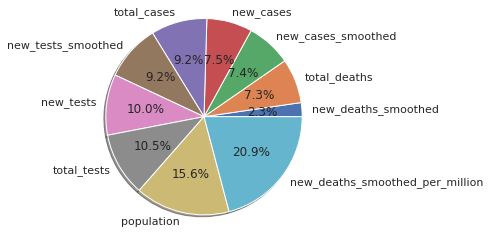

In [139]:
sizes = [mse_pair[1] for mse_pair in MSE_list[:10]]
labels = [mse_pair[0] for mse_pair in MSE_list[:10]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

#### 8. Els valors es troben tots a la mateixa escala? Ens importa?

Com veiem a continuació, la diferència entre la mínima desviació estàndard i la màxima és enorme, però podría pasar que la resta fossin bastant similars. Degut a que la desviació estàndard de les desviacions estàndard és també enorme, podem afirmar que les desviacions estàndard dels diferents atributs son molt diferents. En conseqüència afirmem categòricament que els diferents atributs no es troben a la mateixa escala (ni de lluny).

Ens pot importar, o no. Si utilitzem les equacions normals no ens importa, ja que es tracta d'aplicar una fòrmula. En canvi, si pretenem trobar els paràmetres del model mitjançant descens gradient si que ens importa, ja que les derivades parcials de la funció de perdua respecte dels paràmetres corresponents als atributs amb variancia alta (els paràmetres que multipliquen a l'atribut en l'equació "del model") seràn molt mes elevades que les corresponents a atributs amb variancia baixa. Això provocarà, durant el descens gradient, un avança molt mès ràpid en unes dimensions que en altres (no hi haurà un learning rate óptim).

Com el nostre numero de features és relativament petit (n=41), el mètode de resolució per equacions normals té un cost totalment assumible ($O(n^3)$, per a $n^3=68921$)) i per tant no ens hauría d'importar gaire.

In [140]:
std_dev = dataset.std()
print("La minima desviació estàndard d'entre els atributs és", std_dev.min(), "\n")
print("La máxima desviació estàndard d'entre els atributs és", std_dev.max(), "\n")
print("La desviació estàndard de les desviacions estàndard dels atributs és\n", std_dev.std(),"\n")

La minima desviació estàndard d'entre els atributs és 0.09050015345807413 

La máxima desviació estàndard d'entre els atributs és 612410778.5112376 

La desviació estàndard de les desviacions estàndard dels atributs és
 102035465.45140938 



#### 9. Quins atributs tenen una distribució Gaussiana?

Com veiem a continuació, realitzant els tests de normalitat de kolmogorov (versió lilliefors) i el built-in test de scipy obtenim que cap dels atributs té distribució gaussiana amb una probabilitat del $100*(0.999)^{\textrm{num_atributs}}$%. Es a dir, amb una probabilitat de mes del 95%.

In [141]:
from scipy.stats import normaltest
from statsmodels.stats.diagnostic import lilliefors
gaussian_attributes = []
pvalues = []
for key in dataset:
    numerical = False
    for element in dataset[key]:
        if isinstance(element, float) and not pd.isnull(element):
            numerical = True
            break
        
    
    if numerical:
        _, pvalue1 = normaltest(dataset[key], nan_policy='omit')
        dades = dataset[key].dropna()
        _, pvalue2 = lilliefors(dades)
        if pvalue1 >= 0.001 or pvalue2 >= 0.001:
            gaussian_attributes.append(key)

gaussian_attributes

[]

#### 10. Quin és l'atribut objectiu? Per què?

No hi ha una resposta matemàtica a la pregunta. Teòricament, qualsevol dels atributs numèrics és vàlid per a realitzar regressió sobre ell. Per tant, l'atribut objectiu serà aquell que, per les teves circumstàncies, t'interessi analitzar o predir.

No obstant, dit això, els atributs que semblen tenir mes interès per a un anàlisi de regressió son total_cases, new_cases, total_deaths i new_deaths. El motiu, obviament, és que aquests atributs ens permetràn predir la la incidència i de la pandemia en els diversos paísos al llarg del temps.

## B. Ús de regressor Lineal (30%)


Funcions a tenir en compte

* [data preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)

* [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)

* [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

* [sklearn.linear_model.SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

* [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)



### Preguntes a respondre
1. Aprén un Regressor Lineal amb totes les dades
2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls.
3. És millor o pitjor que utilitzant totes les dades? Per què?
4. Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit?
5. Què passa si normalitzes les dades? El error és més baix? 
6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?
7. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los [Pista](https://stackoverflow.com/questions/34469237/linear-regression-and-gradient-descent-in-scikit-learn-pandas)

#### 0. Pas previ

Com a pas previ anem a quedarnos nomès amb les columnes corresponents a les dades numèriques, i anem a dividir el dataset en un conjunt de training i un de evaluation.

In [142]:
numerical_data = dataset[numeric_attributes].dropna(how='any', axis=0).sample(frac=1, random_state=19)
size = len(numerical_data.index)

eval_dataset = numerical_data[:int(size/6)]
train_dataset = numerical_data[int(size/6):]

#### 1. Aprén un Regressor Lineal amb totes les dades

El model que anem a entrenar serivirà per a predir la variable "new_deaths".

In [143]:
objective_variable = "new_deaths"

X_t = train_dataset.drop(objective_variable, axis=1)
y_t = train_dataset[objective_variable]

X_e = eval_dataset.drop(objective_variable, axis=1)
y_e = eval_dataset[objective_variable]


reg = LinearRegression().fit(X_t, y_t)

Un cop entrenat el model, per completitud, anem a calcular la MSE sobre el dataset de evaluation.

In [144]:
y_pred = reg.predict(X_e)
mse_multivariate = mean_squared_error(y_e, y_pred)
print("El MSE sobre el conjunt de validació és", mse_multivariate)

El MSE sobre el conjunt de validació és 1624.353526091033


#### 2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls.

En el codi següent, dona valor a la variable "show_best_X_attributes" per a triar el nombre d'atributs que es mostrarán al grafic. Si en tries X, es mostrarán els X millors (tals que el model entrenat amb ells te menys MSE). El grafic mostra els MSE obtinguts sobre el conjunt de validació per als diferents atributs.

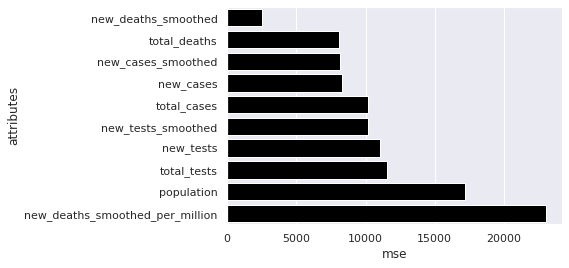

In [145]:
show_best_X_attributes = 10

MSE_list = []

for variable_regressora in X_t:
    reg_uni = LinearRegression().fit(X_t[variable_regressora].to_numpy().reshape(-1, 1), y_t)
    y_pred = reg_uni.predict(X_e[variable_regressora].to_numpy().reshape(-1, 1))
    MSE_list.append((variable_regressora, mean_squared_error(y_e, y_pred)))

MSE_list.sort(key=lambda x:x[1])

df = pd.DataFrame({"attributes" : [x[0] for x in MSE_list[:show_best_X_attributes]], 
                   "mse" : [x[1] for x in MSE_list[:show_best_X_attributes]]})
ax = sns.barplot(x = 'mse', y = 'attributes', 
              data = df, 
              color = 'black')
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

Com veiem per la gràfica generada, l'atribut amb el qual el model obté una MSE menor és "new_deaths_smoothed". Això no és d'extranyar, tenint en compte que estem predint "new_deaths".

#### 3. És millor o pitjor que utilitzant totes les dades? Per què?

Com veiem a continuació, el MSE mes baix obtingut usant una única variable regressora és d'aproximadament 2538 (obtingut amb la variable "new_deaths_smoothed"), mentre que el MSE obtingut usant totes les variables regressores disponibles és d'aproximadament 1624. Per tant, obtenim una millor precissió usant totes les variables.

Obviament, aquest resultat era d'esperar, doncs usant mes informació no podem obtenir resultats pitjors. Observem que qualsevol model d'una variable es pot aconseguir amb diverses variables (posant els coeficients de les altres variables a zero).

In [146]:
print("El MSE mes baix obtingut amb regressió univariada és", MSE_list[0])
print("El MSE obtingut amb regressió multivariada és", mse_multivariate)

El MSE mes baix obtingut amb regressió univariada és ('new_deaths_smoothed', 2538.128777862547)
El MSE obtingut amb regressió multivariada és 1624.353526091033


#### 4. Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit?

Segons els tests que he fet, no hi han atributs amb distribució normal. Tot i això, he de comentar que si que hi ha una relació, ja que entre les hipòtesis del model de regressió lineal està una que suposa normalitat en les dades (tot i que està comprovat que els models lineals es comporten be amb dades no normals).

#### 5. Què passa si normalitzes les dades? El error és més baix?

Efectivament, si normalitzem les dades el error MSE passa a ser molt més petit. En la proxima resposta explicarem el motiu.

Una altre cosa que podría pasar (si estiguessim usant SGD per a l'entrenament del model) sería que la convergència fos millor (mes ràpida i/o que la solució trobada fos millor o fins i tot que passesim de no trobar solució a trobarla). Això és degut a que, si les diferents variables regressores tenen rangs de valors molt diferents, els gradients de la funció objectiu respecte d'alguns dels paràmetres poden ser molt més elevats que els altres.

En el nostre cas no pasa res d'això, perquè estem entrenant el model mitjançant el mètode de les equacions normals.

In [147]:
X_t_norm = (X_t - X_t.mean())/X_t.std()
y_t_norm = (y_t - y_t.mean())/y_t.std()

X_e_norm = (X_e - X_e.mean())/X_e.std()
y_e_norm = (y_e - y_e.mean())/y_e.std()

reg_norm = LinearRegression().fit(X_t_norm, y_t_norm)

y_pred = reg_norm.predict(X_e_norm)
mse_multivariate = mean_squared_error(y_e_norm, y_pred)
print("El MSE sobre el conjunt de validació normalitzat és", mse_multivariate)

El MSE sobre el conjunt de validació normalitzat és 0.04674936002304652


#### 6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?

Com hem explicat en la resposta anterior, en el cas que usesim SGD per a entrenar, podría ser que el model obtingut fos mes precís. En el nostre cas ni molt menys, al usar el mètode de les ecuacions normals trobem la millor solució independentment de que haguem normalitzat les dades o no.

El motiu pel qual estem obtenint una MSE molt mes petita es que, al normalitzar, els valors amb els que treballem pasen a tenir variança 1 i per tant les distàncies entre valors seràn molt mes petites (y la MSE es una mitja de distàncies).

Efectivament, veiem que si calculem el coeficient de determinació $R^2$ dels models (que mesura com de bó és el model, quant mes proper a 1 millor) obtenim que els dos models son gairebé idèntics (suposo que les diferencies es deuen a petits errors numèrics tant en la resolució de les equacions normals com en el càlcul del coeficient $R^2$).

In [148]:
print("El coeficient de determinació R^2 del model 'no normalitzat' és", reg.score(X_e, y_e))
print("El coeficient de determinació R^2 del model 'normalitzat' és",reg_norm.score(X_e_norm, y_e_norm))

El coeficient de determinació R^2 del model 'no normalitzat' és 0.9460044880056814
El coeficient de determinació R^2 del model 'normalitzat' és 0.9531775941019175


#### 7. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los

Com hem comentat en respostes anteriors, hem usat LinearRegression. És a dir, hem torbat el mínim de la funció objectiu mitjançant el mètode de les equacions normals. Bàsicament aquest mètode consisteix en evaluar una fòrmula tancada que dona el mínim global de la funció objectiu MSE.

L'altra opció aproxima el mínim global mitjançant descens gradient.

Les diferències entre un i altre mètode s'han vist a teoria, però en essència seríen:

1. El mètode de les ecuacions normals dona la sol·lució exacta (llevat d'errors numèrics), mentre que el mètode amb SGD aproxima la sol·lució.
2. El mètode SGD pot requerir la normalització de les dades per a funcionar bé, mentre que el mètode de les equacions normals no ho necessita.
3. El mètode de les equacions normals té complexitat O(n^3) (per tant és molt costós si tenim molts features), en canvi el mètode amb SGD es comporta bé per a $n$ gran.

## C. Demostració d'assoliment (A+B en una nova BBDD) (20%)

La puntuació d'aquesta secció dependrà de la originalitat, i el treball realizat l'analisis i procesat d'una base de dades alternativa de lliure elecció. Recordeu que podeu reaprofitar la majoria del codi si ho heu implementat en funcions.

### Tria del dataset a processar

Hem triat el dataset "Boston House Prices", que podem trobar al següent link:
https://www.kaggle.com/vikrishnan/boston-house-prices#

L'he triat perquè m'ha semblat ideal per a un problema de regressió. És un dataset petitet, i consta de diversos descriptors de les zones urbanes de Boston. Com el seu nom indica, l'objectiu és inferir els preus de les cases en funció d'aquests descriptors.

### A. Exploració de la base de dades

#### 1. Dimensionalitat de la BBDD. Quants exemples, quantes caracteristiques tenim.

Com podem veure a continuació, tenim 506 exemples (mostres), cadascún amb 14 característiques (columnes)

In [149]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

print("Dimensionalitat de la BBDD:", dataset.shape)

Dimensionalitat de la BBDD: (506, 14)


#### 2. Com són les característiques?

Com podem veure, totes les característiques son numèriques. En concret tenim 12 floats i dos ints. 

Cal destacar que la variable "CHAS" és dummie. És a dir, pren valors discrets (en el nostre cas 0 i 1) i representa una característica qualitativa i no quantitativa.

In [150]:
for key in dataset:
    for element in dataset[key]:
        if not pd.isnull(element):
            print(type(element))

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class '

<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

#### 3. Hi tenim totes les dades (quin % de dades tenim)

Com podem veure a continuació, tenim el 100% de les dades (no hi ha cap NaN).

In [151]:
100*(1 - dataset.isna().sum().sum()/dataset.size)

100.0

#### 4. Quin tipus de atributs tenim a la base de dades.

Els atributs de la base de dades son

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10000 dollars
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in thousands of dollars

#### 5. Mostra els atributs més rellevants.

Tot i que la importància dels atributs depèn de l'aplicació/estudi que es vulgui realitzar, en la meva opinió els mes rellevants son:
* CRIM: sens dubte la criminalitat de la zona influeix molt en el preu de les cases.
* INDUS: la precessencia o no d'indústria (i per tant de potencial treball) també pot ser rellevant.
* RM: obviament, el nombre d'habitacions influeix fortament en el preu d'una casa.
* DIS: crec que és important pel mateix motiu que la variable INDUS.
* LSTAT: obviament, la probresa de la població influeix en el preu de les vivendes.

* MEDV: per ser la variable a predir.

In [152]:
dataset[["CRIM", "INDUS", "RM", "DIS", "LSTAT", "MEDV"]].head()

,CRIM,INDUS,RM,DIS,LSTAT,MEDV
0,0.006,2.310,6.575,4.090,4.980,24.000
1,0.027,7.070,6.421,4.967,9.140,21.600
2,0.027,7.070,7.185,4.967,4.030,34.700
3,0.032,2.180,6.998,6.062,2.940,33.400
4,0.069,2.180,7.147,6.062,5.330,36.200


#### 6. Quins atributs están més correlacionats. Mostra'ls.

A continuació veiem les 5 parelles d'atributs mes correlacionats.

In [153]:
corrMatrix = dataset.corr().abs()
corrVector = corrMatrix.unstack() #Flattens the corrMatrix
corrVector.sort_values(ascending=False)[corrMatrix.shape[0]:corrMatrix.shape[0]+10:2]

RAD    TAX    0.910
NOX    DIS    0.769
INDUS  NOX    0.764
AGE    DIS    0.748
LSTAT  MEDV   0.738
dtype: float64

#### 7. Mostra (almenys) 5 tipus diferents de gràfiques sobre les dades.

A continuació veiem els box-plot d'alguns dels atributs.

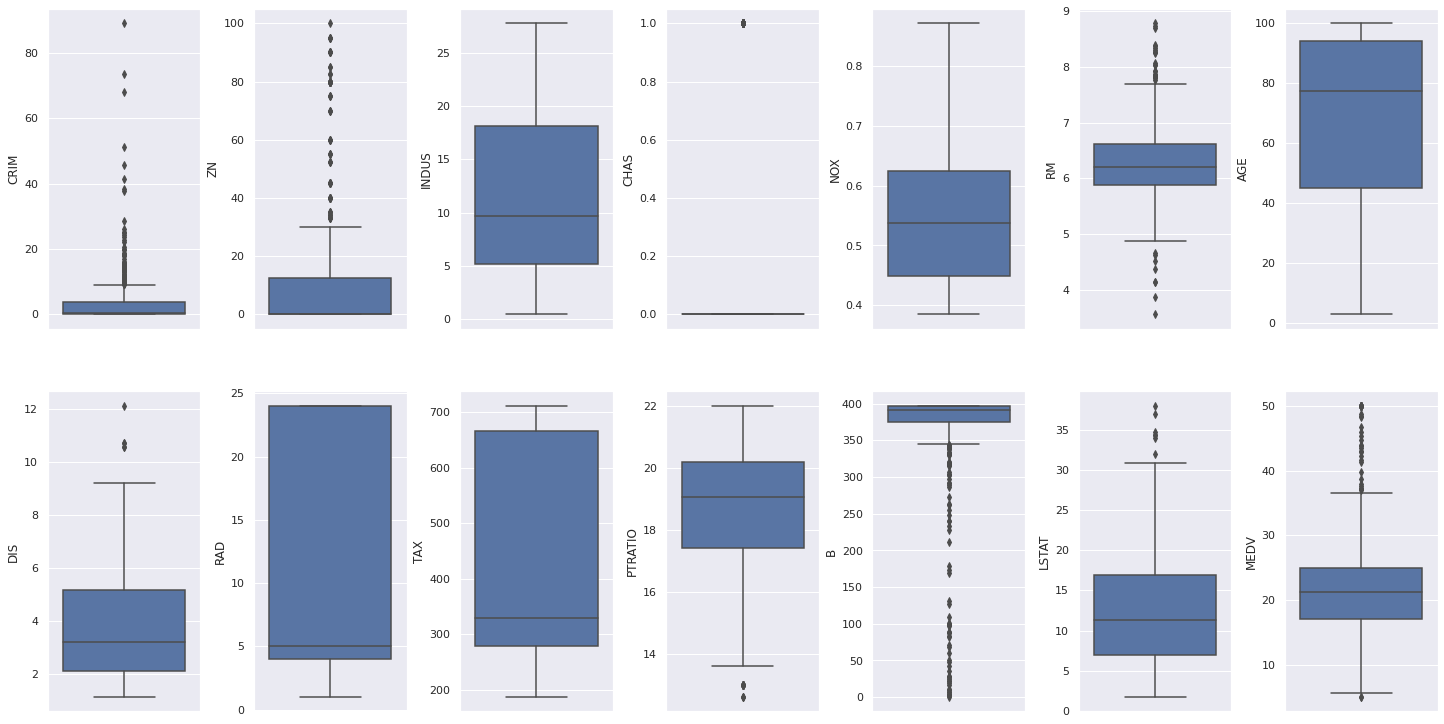

In [154]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.boxplot(y=k, data=dataset, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

A conntinuació veiem gràfiques de tipus "X"vs"MEDV". On "X" son els altres atributs del dataset. També inclouen la recta de regressió simple de "MEDV" respecte de "X".

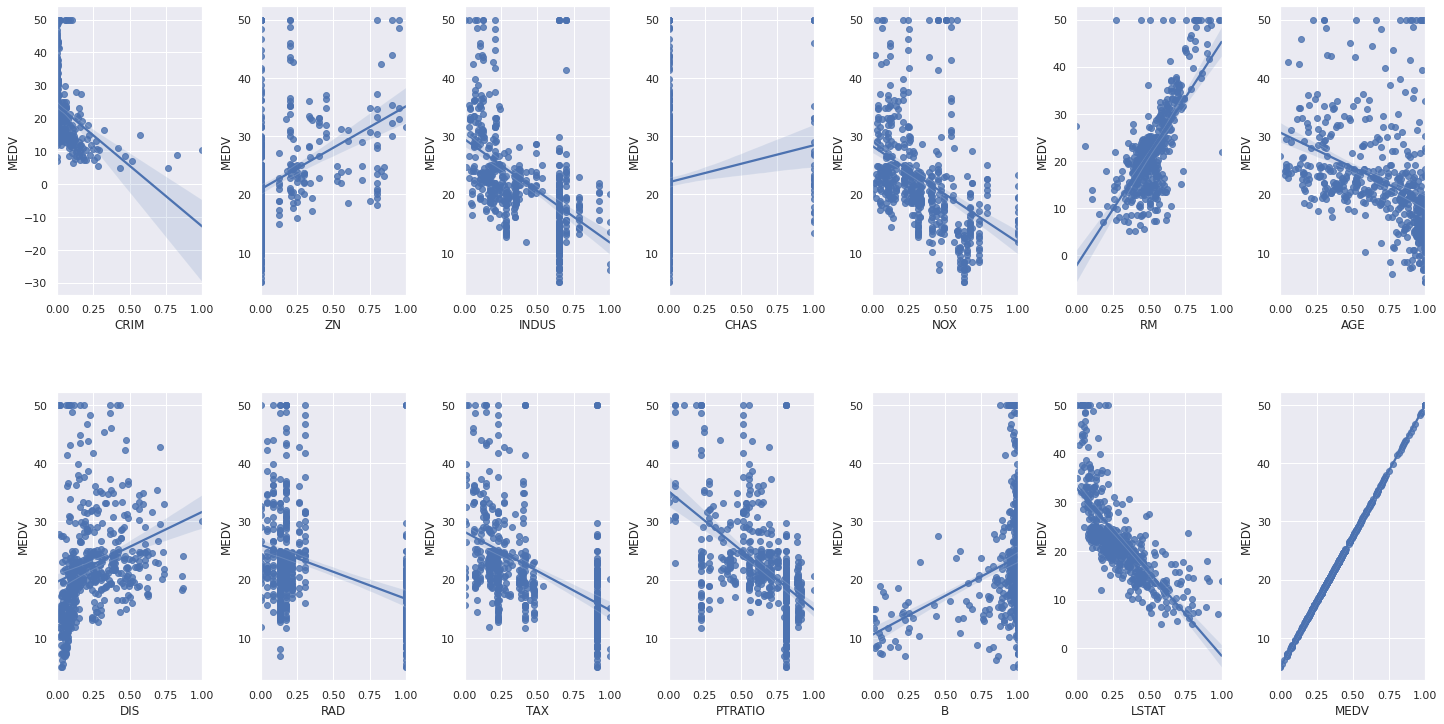

In [155]:
min_max_scaler = preprocessing.MinMaxScaler()
x = dataset
y = dataset['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=dataset.columns.values)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(dataset.columns.values):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

A continuació podem veure l'histograma d'alguns dels atributs del dataset.

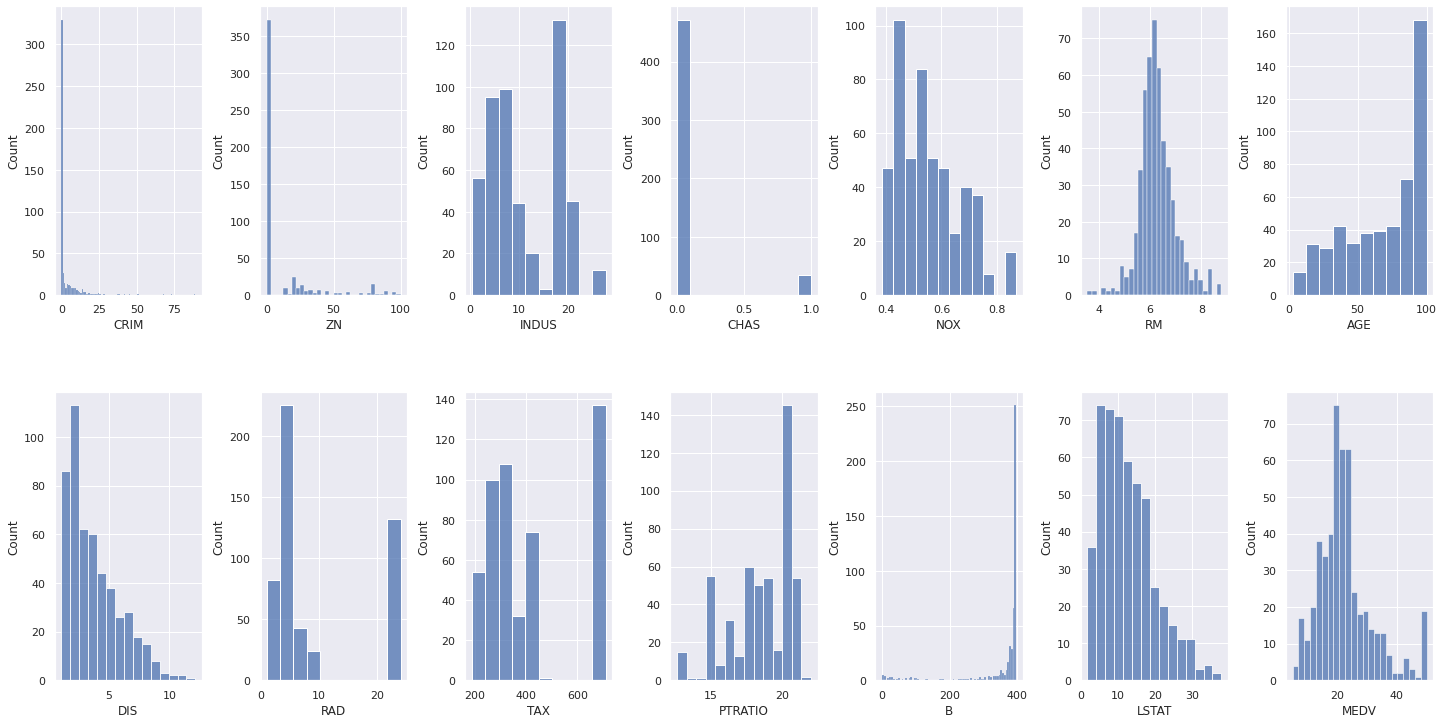

In [156]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in dataset.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

A continuació veiem un barplot dels MSE's obtinguts fent models de regressió lineal de "new_deaths" respecte d'alguns dels atributs del dataset.

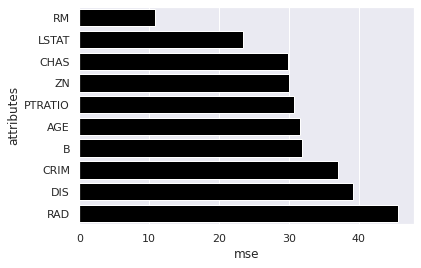

In [157]:
size = len(dataset.index)

eval_dataset = dataset[:int(size/6)]
train_dataset = dataset[int(size/6):]

objective_variable = "MEDV"

X_t = train_dataset.drop(objective_variable, axis=1)
y_t = train_dataset[objective_variable]

X_e = eval_dataset.drop(objective_variable, axis=1)
y_e = eval_dataset[objective_variable]

show_best_X_attributes = 10

MSE_list = []

for variable_regressora in X_t:
    reg_uni = LinearRegression().fit(X_t[variable_regressora].to_numpy().reshape(-1, 1), y_t)
    y_pred = reg_uni.predict(X_e[variable_regressora].to_numpy().reshape(-1, 1))
    MSE_list.append((variable_regressora, mean_squared_error(y_e, y_pred)))

MSE_list.sort(key=lambda x:x[1])

df = pd.DataFrame({"attributes" : [x[0] for x in MSE_list[:show_best_X_attributes]], 
                   "mse" : [x[1] for x in MSE_list[:show_best_X_attributes]]})
ax = sns.barplot(x = 'mse', y = 'attributes', 
              data = df, 
              color = 'black')
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

Finalment, veiem un pie chart de les 10 MSE's mes baixes obtingudes anteriorment.

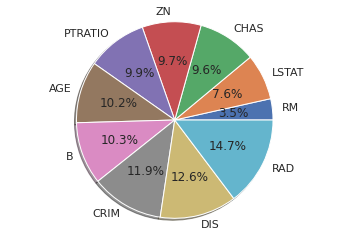

In [158]:
sizes = [mse_pair[1] for mse_pair in MSE_list[:10]]
labels = [mse_pair[0] for mse_pair in MSE_list[:10]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

#### 8. Els valors es troben tots a la mateixa escala? Ens importa?

Tot i que no és ni de lluny tan acusat com en el primer dataset, veiem que segueixen sent grans tant la diferencia entre la desviació estàndard més petita i la mes gran, com la desviació estàndard de les desviacions estàndards. Per tant, els atributs no es troben tots a la mateixa escala.

Ens pot importar, o no. Si utilitzem les equacions normals no ens importa, ja que es tracta d'aplicar una fòrmula. En canvi, si pretenem trobar els paràmetres del model mitjançant descens gradient si que ens importa, ja que les derivades parcials de la funció de perdua respecte dels paràmetres corresponents als atributs amb variancia alta (els paràmetres que multipliquen a l'atribut en l'equació "del model") seràn molt mes elevades que les corresponents a atributs amb variancia baixa. Això provocarà, durant el descens gradient, un avança molt mès ràpid en unes dimensions que en altres (no hi haurà un learning rate óptim).

Com el nostre numero de features és relativament petit (n=13), el mètode de resolució per equacions normals té un cost totalment assumible ($O(n^3)$, per a $n^3=2197$)) i per tant no ens hauría d'importar gaire.

In [159]:
std_dev = dataset.std()
print("La minima desviació estàndard d'entre els atributs és", std_dev.min(), "\n")
print("La máxima desviació estàndard d'entre els atributs és", std_dev.max(), "\n")
print("La desviació estàndard de les desviacions estàndard dels atributs és\n", std_dev.std(),"\n")

La minima desviació estàndard d'entre els atributs és 0.11587767566755595 

La máxima desviació estàndard d'entre els atributs és 168.53711605495903 

La desviació estàndard de les desviacions estàndard dels atributs és
 47.480040242454464 



#### 9. Quins atributs tenen una distribució Gaussiana?

Com veiem a continuació, realitzant els tests de normalitat de kolmogorov (versió lilliefors) i el built-in test de scipy obtenim que cap dels atributs té distribució gaussiana amb una probabilitat del $100*(0.999)^{\textrm{num_atributs}}$%. Es a dir, amb una probabilitat de mes del 98%.

In [160]:
gaussian_attributes = []
pvalues = []
for key in dataset:
    numerical = False
    for element in dataset[key]:
        if isinstance(element, float) and not pd.isnull(element):
            numerical = True
            break
        
    
    if numerical:
        _, pvalue1 = normaltest(dataset[key], nan_policy='omit')
        dades = dataset[key].dropna()
        _, pvalue2 = lilliefors(dades)
        if pvalue1 >= 0.001 or pvalue2 >= 0.001:
            gaussian_attributes.append(key)

gaussian_attributes

[]

#### 10. Quin és l'atribut objectiu? Per què?

Tot i que tornem a resaltar que, teòricament, qualsevol atribut podría ser "l'objectiu", en aquest cas en la documentació del dataset ens diuen que aquest està dissenyat per a realitzar prediccions sobre el preu de les vivendes. És a dir, l'atribut objectiu és "MEDV".

### B. Ús de regressor Lineal

#### 0. Pas previ

Com a pas previ anem a dividir el dataset en un conjunt de training i un de evaluation.

In [161]:
size = len(dataset.index)

eval_dataset = dataset[:int(size/6)]
train_dataset = dataset[int(size/6):]

#### 1. Aprén un Regressor Lineal amb totes les dades

El model que anem a entrenar serivirà per a predir la variable "MEDV".

In [162]:
objective_variable = "MEDV"

X_t = train_dataset.drop(objective_variable, axis=1)
y_t = train_dataset[objective_variable]

X_e = eval_dataset.drop(objective_variable, axis=1)
y_e = eval_dataset[objective_variable]


reg = LinearRegression().fit(X_t, y_t)

Un cop entrenat el model, per completitud, anem a calcular la MSE sobre el dataset de evaluation.

In [163]:
y_pred = reg.predict(X_e)
mse_multivariate = mean_squared_error(y_e, y_pred)
print("El MSE sobre el conjunt de validació és", mse_multivariate)

El MSE sobre el conjunt de validació és 10.487368165414678


#### 2. Calcula l'error quadràtic mitjà del regressor per a cada un dels atributs de la base de dades. Quin atribut té l'error més baix. Mostra'ls.

En el codi següent, dona valor a la variable "show_best_X_attributes" per a triar el nombre d'atributs que es mostrarán al grafic. Si en tries X, es mostrarán els X millors (tals que el model entrenat amb ells te menys MSE). El grafic mostra els MSE obtinguts sobre el conjunt de validació per als diferents atributs.

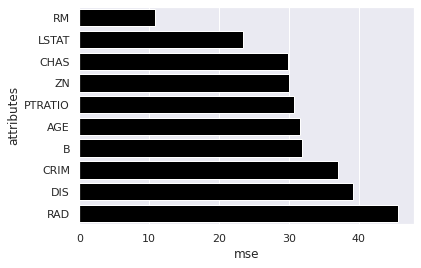

In [164]:
show_best_X_attributes = 10

MSE_list = []

for variable_regressora in X_t:
    reg_uni = LinearRegression().fit(X_t[variable_regressora].to_numpy().reshape(-1, 1), y_t)
    y_pred = reg_uni.predict(X_e[variable_regressora].to_numpy().reshape(-1, 1))
    MSE_list.append((variable_regressora, mean_squared_error(y_e, y_pred)))

MSE_list.sort(key=lambda x:x[1])

df = pd.DataFrame({"attributes" : [x[0] for x in MSE_list[:show_best_X_attributes]], 
                   "mse" : [x[1] for x in MSE_list[:show_best_X_attributes]]})
ax = sns.barplot(x = 'mse', y = 'attributes', 
              data = df, 
              color = 'black')
#ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

Com veiem en la gràfica generada, l'atribut amb menys MSE és "RM" (mitjana d'habitacions per casa).

#### 3. És millor o pitjor que utilitzant totes les dades? Per què?

Com era d'esperar, el MSE obtingut amb la regressió multivariada és menor que el millor MSE obtingut amb la regressió simple. Això si, aquesta vegada la diferència és molt petita. Segurament aixo es degui a que el nostre dataset és massa petit com per a entrenar bé 14 paràmetres. També podría ser que la resta d'atributs determinessin casi per igual "RM" i "MDEV" (la variable a predir).

In [165]:
print("El MSE mes baix obtingut amb regressió univariada és", MSE_list[0])
print("El MSE obtingut amb regressió multivariada és", mse_multivariate)

El MSE mes baix obtingut amb regressió univariada és ('RM', 10.806825167542849)
El MSE obtingut amb regressió multivariada és 10.487368165414678


#### 4. Tenen alguna relació els atributs amb distribucions Gaussianes i els que tenen un error més petit?

Segons els tests que he fet, no hi han atributs amb distribució normal. Tot i això, he de comentar que si que hi ha una relació, ja que entre les hipòtesis del model de regressió lineal està una que suposa normalitat en les dades (tot i que està comprovat que els models lineals es comporten be amb dades no normals).

#### 5. Què passa si normalitzes les dades? El error és més baix?

Efectivament, si normalitzem les dades el error MSE passa a ser molt més petit. En la proxima resposta explicarem el motiu.

Una altre cosa que podría pasar (si estiguessim usant SGD per a l'entrenament del model) sería que la convergència fos millor (mes ràpida i/o que la solució trobada fos millor o fins i tot que passesim de no trobar solució a trobarla). Això és degut a que, si les diferents variables regressores tenen rangs de valors molt diferents, els gradients de la funció objectiu respecte d'alguns dels paràmetres poden ser molt més elevats que els altres.

En el nostre cas no pasa res d'això, perquè estem entrenant el model mitjançant el mètode de les equacions normals.

In [166]:
X_t_norm = (X_t - X_t.mean())/X_t.std()
y_t_norm = (y_t - y_t.mean())/y_t.std()

#Corregim un zero-division. En principi s'hauria de fer la comprovació per defecte pero... qui ho fa? :)
std_X = X_e.std()
std_X[std_X == 0] = 1

X_e_norm = (X_e - X_e.mean())/std_X
y_e_norm = (y_e - y_e.mean())/y_e.std()

reg_norm = LinearRegression().fit(X_t_norm, y_t_norm)

y_pred = reg_norm.predict(X_e_norm)
mse_multivariate = mean_squared_error(y_e_norm, y_pred)
print("El MSE sobre el conjunt de validació normalitzat és", mse_multivariate)

El MSE sobre el conjunt de validació normalitzat és 0.3453595116409816


#### 6. Significa això que el regressor és més precís? Passa el mateix amb altres mètriques?

Com hem explicat en la resposta anterior, en el cas que usesim SGD per a entrenar, podría ser que el model obtingut fos mes precís. En el nostre cas ni molt menys, al usar el mètode de les ecuacions normals trobem la millor solució independentment de que haguem normalitzat les dades o no.

El motiu pel qual estem obtenint una MSE molt mes petita es que, al normalitzar, els valors amb els que treballem pasen a tenir variança 1 i per tant les distàncies entre valors seràn molt mes petites (y la MSE es una mitja de distàncies).

Efectivament, veiem que si calculem el coeficient de determinació $R^2$ dels models (que mesura com de bó és el model, quant mes proper a 1 millor) obtenim que els dos models son gairebé idèntics (suposo que les diferencies es deuen a petits errors numèrics tant en la resolució de les equacions normals com en el càlcul del coeficient $R^2$).

In [167]:
print("El coeficient de determinació R^2 del model 'no normalitzat' és", reg.score(X_e, y_e))
print("El coeficient de determinació R^2 del model 'normalitzat' és",reg_norm.score(X_e_norm, y_e_norm))

El coeficient de determinació R^2 del model 'no normalitzat' és 0.6420028515626042
El coeficient de determinació R^2 del model 'normalitzat' és 0.6504795303874404


#### 7. Heu après un LinearRegression o un SGDRegressor? Sabeu quines diferencies hi ha? Compareu-los

Ja hem respost per a l'anterior dataset, i la resposta és la mateixa.

## D. Implementació Regressor Lineal (20%)

En aquest exercici, es tracta d'implementar en python el procés de descens del gradient explicat a les classes de teoria, i comparar-lo amb els resultats obtinguts amb l'apartat (B). 

$$J(w) = \frac{1}{2m} \left[ \sum^m_{i=1}(f(x^{i}; w) - y^{i})^2 + \lambda\sum_{j=1}^{n}(w_{j}^2) \right]$$

Fixeu-vos que $J$ retorna el `mse`. Per a trobar $w_j$, repetir fins convergència:
$$w_0 = w_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot 1$$
$$w_j = w_j - \alpha \left[\frac{1}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i} - \frac{\lambda}{m}w_{j} \right]$$


ó:

$$w_{j} := w_{j} \left(1-\alpha \frac{\lambda}{m} \right) - \alpha\frac{\lambda}{m} \sum_{i=1}^{m}(f(x^{i}; w)-y^{i}) \cdot x_{j}^{i}$$

On si considerem un regressor lineal (el model és una recta), llavors $w_0$ i $w_1$ representen, respectivament, la $b$ i $a$ de la fòrmula de la recta: 

$$h_\theta(x^{(i)}) = ax + b$$

$\alpha$ és el learning rate, i $h_\theta(x^{(i)})$ és la funció que fa la regressió, és a dir, la funció que prediu el valor de $y^{(i)}$ donat un(s) atribut(s) concret(s) $x^{(i)}$.

Així, tenint calculat el model en l'últim punt del primer exercici, ja sabeu quin resultat hauríeu d'obtenir. O no, perquè la vostra implementació pot ser millor! En concret, es tracta de desenvolupar aquestes tasques:

* Definir la funció de cost i del gradient

* Estudiar com l'ús de regularitzadors afecta el resultat: overfitting, underfitting, etc. 

* Visualització de les dades a analitzar i explicació pas a pas del procediment   

* Visualització del procés de descens de gradient 

* Modificar el learning rate i el nombre d'iteracions 

<img src="https://miro.medium.com/max/810/1*UUHvSixG7rX2EfNFTtqBDA.gif">

Per a la implementació us podeu basar en el següent esquelet:

In [194]:
class Regressor(object):
    def __init__(self, w0=1, w1=1, alpha=0.001, regularization_coef=0.001):
        # Inicialitzem w0 i w1 
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha
        self.regularization_coef = regularization_coef

        
    def predict(self, x):
        # implementar aqui la funció de prediccio
        return self.w0 + self.w1*x.to_numpy()
    
    def __update(self, x, y):
        # actualitzar aqui els pesos donada la x i la y real.
        # h = fer prediccio(x)
        h = self.predict(x)
        
        # calcular gradient w0
        # calcular gradient w1
        grad_0 = (h-y.to_numpy()).mean() + self.regularization_coef*self.w0
        grad_1 = ((h-y.to_numpy())*x.to_numpy()).mean() + self.regularization_coef*self.w1
        print(grad_0)
        print(grad_1, "\n")
        
        # actualitzar w0 amb alpha
        # actualitzar w1 amd alpha
        self.w0 -= self.alpha * grad_0
        self.w1 -= self.alpha * grad_1
        
        # retornar el error
        return mean_squared_error(y, self.predict(x))
    
    def fit(self, x, y, max_iter=1000, epsilon=1e-3):
        millora = 10
        i = 0
        anterior_mse = float('inf')
        
        while i < max_iter and millora > epsilon:
            millora = anterior_mse 
            anterior_mse = self.__update(x, y)
            millora -= anterior_mse
            millora = abs(millora)
            i += 1

In [195]:
dataset = load_dataset('owid-covid-data.csv')
numerical_data = dataset[numeric_attributes].dropna(how='any', axis=0).sample(frac=1, random_state=19)
size = len(numerical_data.index)

eval_dataset = numerical_data[:int(size/6)]
train_dataset = numerical_data[int(size/6):]

objective_variable = "new_deaths"
regressor_variable = "total_deaths"

X_t = train_dataset[regressor_variable]
y_t = train_dataset[objective_variable]

X_e = eval_dataset[regressor_variable]
y_e = eval_dataset[objective_variable]

reg = Regressor()
reg.fit(X_t, y_t)


print("El MSE sobre el conjunt de evaluation és", mean_squared_error(y_e, reg.predict(X_e)))
print("Amb el model built-in de scikit, sortia un MSE de", mse_total_deaths)

3416.4418099688473
152280898.06174764 

-528624069.55381
-23497538087543.7 

81568759741234.44
3.625762017455749e+18 

-1.2586378614598576e+19
-5.5946925836429225e+23 

1.9421274411007574e+24
8.632829445169487e+28 

-2.99677859134295e+29
-1.3320793433275418e+34 

4.6241465598371715e+34
2.0554505196587925e+39 

-7.13523897582026e+39
-3.171640533222168e+44 

1.1009952773611322e+45
4.893965374387926e+49 

-1.6988787689933893e+50
-7.551579958330111e+54 

2.6214363776873927e+55
1.1652383191245018e+60 

-4.0449788458622715e+60
-1.7980082947520578e+65 

6.241560543959322e+65
2.774397112537617e+70 

-9.630972004652174e+70
-4.281003241488665e+75 

1.4860966436376914e+76
6.605755416488875e+80 

-2.293105237108381e+81
-1.0192938935336622e+86 

3.5383510560810215e+86
1.5728103386958975e+91 

-5.459814051908659e+91
-2.4269078596486354e+96 

8.424706596081934e+96
3.744813735207222e+101 

-1.2999651738185945e+102
-5.7783940398244006e+106 

2.005897100235077e+107
8.916287975970719e+111 

-3.0951776691

/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/home/albert/miniconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
<ipython-input-194-91214abaf9f1>:42: RuntimeWarning: invalid value encountered in double_scalars
  millora -= anterior_mse
/home/albert/miniconda3/lib/python3.8/site-packages/sklearn/metrics/_regression.py:258: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,


Així es podrà contestar a aquestes preguntes:

1. Com influeixen tots els paràmetres en el procés de descens? 
2. Quins valors de learning rate convergeixen més ràpid a la solució òptima? 
3. Com influeix la inicialització del model en el resultat final? 
4. Quina diferència (quantitativa i qualitativa) hi ha entre el vostre regressor i el de la llibreria ?
5. Evalueu mètriques de execució




## (Extra) Implementació Regresor polinomial (+10%, max: 10pts)
1. Quins parametres heu de cambiar al vostre Regressor per tal de poder predir amb funcions polinomials?
2. Quines funcions polinomials (de diferent grau, de diferents combinacions d'atributs, ...) heu escollit per ser apreses amb el vostre descens del gradient? quina ha donat el millor resultat (en error i rapidesa en convergència)?
3. Utilitzeu el regularitzador en la fòrmula de funció de cost i descens del gradient i proveu polinomis de diferent grau. Com afecta el valor del regularitzador?
4. Té sentit el model (polinomial) trobat quan es visualitza sobre les dades? 
